In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/mattmastin/Desktop/shopify_challenge/shopify_challenge_data.csv')

print(df.shape)

df.head()

(5000, 7)


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [40]:
# Quick check of summary statistics
# For 'order_amount', the high standard deviation and mean at almost 10x
# as large the median indicate outlier(s)

df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [71]:
# Creating new feature 'avg_shoe_cost' to see if the outlier cause for
# 'order_amount' is either the cost of a shoe or order volume

df['avg_shoe_cost'] = df['order_amount'] / df['total_items']
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,avg_shoe_cost
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0
2,3,44,861,144,1,cash,2017-03-14 4:23:56,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,156.0


In [76]:
print(f'\nOriginal DataFrame Shape: {df.shape}\n')
df.describe().round(1)


Original DataFrame Shape: (5000, 8)



,order_id,shop_id,user_id,order_amount,total_items,avg_shoe_cost
count,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0
mean,2500.5,50.1,849.1,3145.1,8.8,387.7
std,1443.5,29.0,87.8,41282.5,116.3,2442.0
min,1.0,1.0,607.0,90.0,1.0,90.0
25%,1250.8,24.0,775.0,163.0,1.0,133.0
50%,2500.5,50.0,849.0,284.0,2.0,153.0
75%,3750.2,75.0,925.0,390.0,3.0,169.0
max,5000.0,100.0,999.0,704000.0,2000.0,25725.0


In [42]:
# There are 19 orders over $100,000 and 17 are the exact same at different times

orders_over_100k = df[df['order_amount'] >= 100000]
print(orders_over_100k.shape)
print(f"Average total items in orders over $100k: {int(orders_over_100k['total_items'].mean())}")
orders_over_100k

(19, 7)
Average total items in orders over $100k: 1790


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
691,692,78,878,154350,6,debit,2017-03-27 22:51:43
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00


In [65]:
expensive_shoes = df[df['avg_shoe_cost'] >= 1000]
print(expensive_shoes.shape)
print(expensive_shoes['avg_shoe_cost'].mean())
expensive_shoes.head()

(46, 8)
25725.0


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,avg_shoe_cost
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57,25725.0
490,491,78,936,51450,2,debit,2017-03-26 17:08:19,25725.0
493,494,78,983,51450,2,cash,2017-03-16 21:39:35,25725.0
511,512,78,967,51450,2,cash,2017-03-09 7:23:14,25725.0
617,618,78,760,51450,2,cash,2017-03-18 11:18:42,25725.0


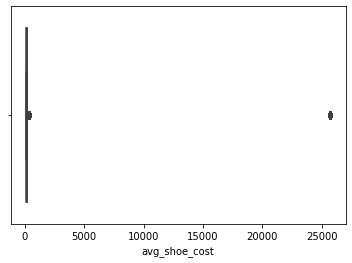

In [26]:
# Boxplot to visualize outliers
# There seems to be one pair that costs $25,725, schewing the average high
# Possibly the DJ Khaled x Air Jordan 3 'Grateful' or Auto-Lacing Nike Mag
# It is the only shoe in the dataset that costs over $1,000

sns.boxplot(x=df['avg_shoe_cost'])

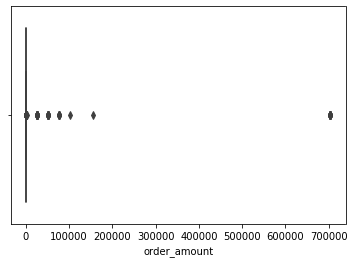

In [41]:
# There is also a single anomalous outlier for orders of $704,000
# The similar orders are also strangely always placed at the same exact time

sns.boxplot(x=df['order_amount'])

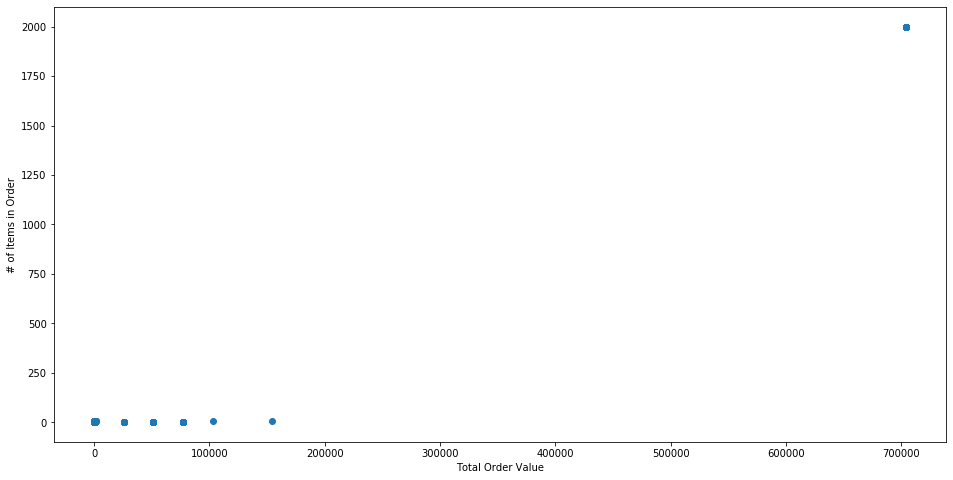

In [44]:
# I believe the skew is more due to the anomalous $704k order 
# rather than the expensive sneaker

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['order_amount'], df['total_items'])
ax.set_xlabel('Total Order Value')
ax.set_ylabel('# of Items in Order')
plt.show();

In [55]:
df_one_anomaly_removed = df[df['order_amount'] < 700000]

df_one_anomaly_removed.describe()

,order_id,shop_id,user_id,order_amount,total_items,avg_shoe_cost
count,4983.000000,4983.000000,4983.000000,4983.000000,4983.00000,4983.00000
mean,2501.060405,50.106362,849.918322,754.091913,1.99398,387.86474
std,1443.090253,29.051718,86.800308,5314.092293,0.98318,2446.12562
min,1.000000,1.000000,700.000000,90.000000,1.00000,90.00000
25%,1250.500000,24.000000,776.000000,163.000000,1.00000,133.00000
50%,2502.000000,50.000000,850.000000,284.000000,2.00000,153.00000
75%,3750.500000,75.000000,925.000000,390.000000,3.00000,168.00000
max,5000.000000,100.000000,999.000000,154350.000000,8.00000,25725.00000


In [74]:
df_two_anomalies_removed = df_one_anomaly_removed[df_one_anomaly_removed[
                                'avg_shoe_cost'] < 25000]

print(f'\nCleaned DataFrame Shape:{df_two_anomalies_removed.shape}')
print(f'Amount of total orders retained after removing outliers: {df_two_anomalies_removed.shape[0] / df.shape[0]:.1%}\n')
df_two_anomalies_removed.describe().round(1)


Cleaned DataFrame Shape:(4937, 8)
Amount of total orders retained after removing outliers: 98.7%



,order_id,shop_id,user_id,order_amount,total_items,avg_shoe_cost
count,4937.0,4937.0,4937.0,4937.0,4937.0,4937.0
mean,2499.6,49.8,849.8,302.6,2.0,151.8
std,1444.1,29.1,86.8,160.8,1.0,29.0
min,1.0,1.0,700.0,90.0,1.0,90.0
25%,1248.0,24.0,775.0,163.0,1.0,132.0
50%,2497.0,50.0,850.0,284.0,2.0,153.0
75%,3751.0,74.0,925.0,387.0,3.0,166.0
max,5000.0,100.0,999.0,1760.0,8.0,352.0


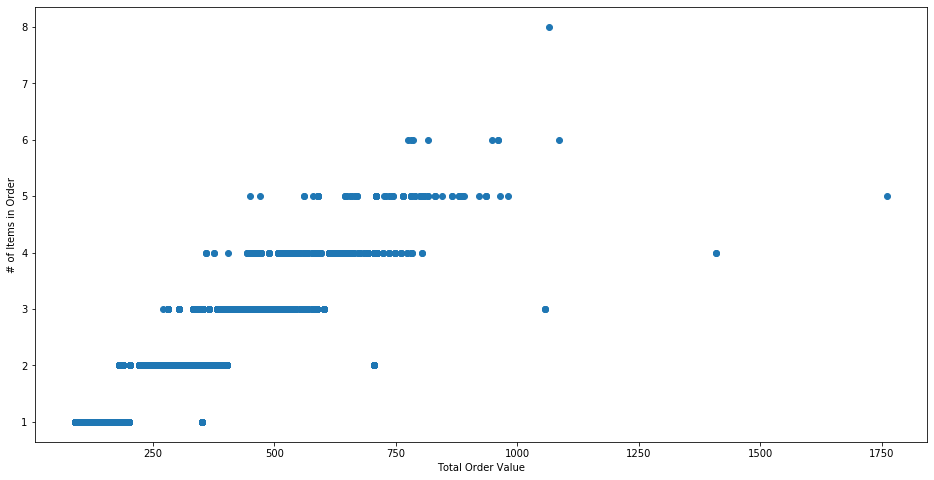

In [63]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_two_anomalies_removed['order_amount'], df_two_anomalies_removed['total_items'])
plt.title('')
ax.set_xlabel('Total Order Value')
ax.set_ylabel('# of Items in Order')
plt.show();